In [12]:
import os

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, MaxNLocator
from cdae.utils import *

import seaborn as sns

%matplotlib inline

matplotlib.font_manager._rebuild()

plt.style.use('clean.mplstyle')
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times"],
})

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

alpha_1 = 0.75
font_size = 20

def change_spine_asthetics(ax):
    for spine in ['right', 'top']:
        ax.spines[spine].set_visible(True)
        ax.spines[spine].set_linewidth(0.5)
        ax.spines[spine].set_color('#BABABA')
    return None



## Fig. 8

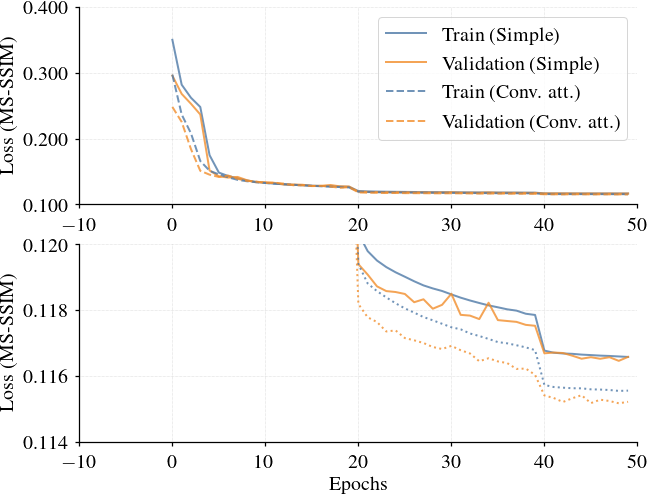

In [13]:
# Load data
run_id_ae_1 = 1632282330    # Plain 
run_id_ae_3 = 1633690232    # Conv. Att

path_results = "../results/autoencoder_carla/"
path_data_1 = os.path.join(path_results, f"1632282330_128_Simple/1632282330_log.txt")
path_data_2 = os.path.join(path_results, f"1633690232_128_ConvAtt/1633690232_log.txt")

text = ""
save_fig = False

n = 50
lw = 2

data_1 = np.genfromtxt(path_data_1, dtype=float, delimiter=",", names=True)
data_3 = np.genfromtxt(path_data_2, dtype=float, delimiter=",", names=True)

# Plot
fig = plt.figure(figsize=(10, 8))

ax1 = fig.add_subplot(211)

ax1.tick_params(axis='both', which='major', labelsize=font_size)
ax1.tick_params(axis='both', which='minor', labelsize=font_size)

ax1.set_ylabel("Loss (MS-SSIM)", fontsize=font_size)

ax1.plot(data_1["epoch"][:n], data_1["loss_train"][:n], alpha=0.8, c=colors[0],  linestyle="-", linewidth=lw)
ax1.plot(data_1["epoch"][:n], data_1["loss_val"][:n], alpha=0.8, c=colors[1],linewidth=lw, linestyle="-")
ax1.plot(data_3["epoch"][:n], data_3["loss_train"][:n], alpha=0.8, c=colors[0], linestyle="--",linewidth=lw)
ax1.plot(data_3["epoch"][:n], data_3["loss_val"][:n], alpha=0.8, c=colors[1], linestyle="--",linewidth=lw)

ax1.legend(["Train (Simple)", "Validation (Simple)", 
    "Train (Conv. att.)", "Validation (Conv. att.)"], prop={"size":font_size})

ax1.plot()
ax1.grid(linestyle=':')
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

ax2 = fig.add_subplot(212)

ax2.tick_params(axis='both', which='major', labelsize=font_size)
ax2.tick_params(axis='both', which='minor', labelsize=font_size)

ax2.set_xlabel("Epochs", fontsize=font_size)
ax2.set_ylabel("Loss (MS-SSIM)", fontsize=font_size)

ax2.plot(data_1["epoch"][:n], data_1["loss_train"][:n], alpha=0.8, c=colors[0],linewidth=lw)
ax2.plot(data_1["epoch"][:n], data_1["loss_val"][:n], alpha=0.8, c=colors[1],linewidth=lw, linestyle="-")
ax2.plot(data_3["epoch"][:n], data_3["loss_train"][:n], alpha=0.8, c=colors[0], linestyle=":",linewidth=lw)
ax2.plot(data_3["epoch"][:n], data_3["loss_val"][:n], alpha=0.8, c=colors[1], linestyle=":",linewidth=lw)

# ax1.legend(["Train (Simple)", "Validation (Simple)", 
#     "Train (Conv. att.)", "Validation (Conv. att.)"], prop={"size":16})

ax2.plot()
ax2.grid(linestyle=':')
ax2.set_ylim([0.114, 0.12])

ax2.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

# if save_fig:
#     fig.savefig(os.path.join(path_results, f"{run_id}/{run_id}.png"), dpi=250)
fig.savefig("results_ae_zoom.pdf", dpi=300)

## Fig. 8 (updated)

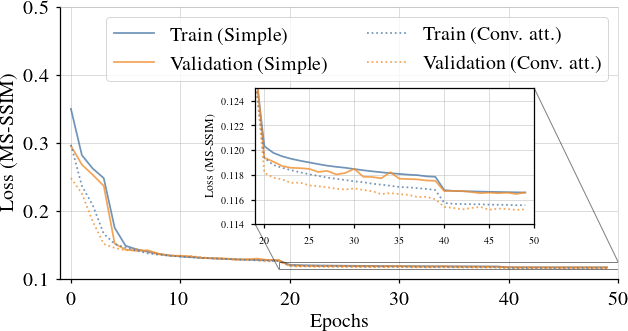

In [27]:
#plt.style.use('clean.mplstyle')
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(data_1["epoch"][:n], data_1["loss_train"][:n], alpha=alpha_1, c=colors[0])
ax.plot(data_1["epoch"][:n], data_1["loss_val"][:n], alpha=alpha_1, c=colors[1], linestyle="-")
ax.plot(data_3["epoch"][:n], data_3["loss_train"][:n], alpha=alpha_1, c=colors[0],linestyle=":")
ax.plot(data_3["epoch"][:n], data_3["loss_val"][:n], alpha=alpha_1, c=colors[1], linestyle=":")
ax.set_xlim([-1, 50])
ax.set_ylim([0.1, 0.5])
ax.grid()
ax.set_xlabel("Epochs", fontsize=font_size)
ax.set_ylabel("Loss (MS-SSIM)", fontsize=font_size)

ax.legend(["Train (Simple)", "Validation (Simple)", 
    "Train (Conv. att.)", "Validation (Conv. att.)"], ncol=2, fontsize=font_size)
# ax.legend(["Train (Simple)", "Validation (Simple)"], ncol=2)
ax.tick_params(axis='both', which='major', labelsize=font_size)
ax.tick_params(axis='both', which='minor', labelsize=font_size)

# inset axes.... (add inplot)
axins = ax.inset_axes([0.35, 0.2, 0.5, 0.5])

axins.plot(data_1["epoch"][:n], data_1["loss_train"][:n], alpha=alpha_1, c=colors[0])
axins.plot(data_1["epoch"][:n], data_1["loss_val"][:n], alpha=alpha_1, c=colors[1], linestyle="-")
axins.plot(data_3["epoch"][:n], data_3["loss_train"][:n], alpha=alpha_1, c=colors[0], linestyle=":")
axins.plot(data_3["epoch"][:n], data_3["loss_val"][:n], alpha=alpha_1, c=colors[1], linestyle=":")
axins.spines['right'].set_visible(True)
axins.spines['top'].set_visible(True)

# sub region of the original image
x1, x2, y1, y2 = 19, 50, 0.114, 0.125
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
#axins.set_xlabel("Epochs")
axins.set_ylabel("Loss (MS-SSIM)", fontsize=12)
axins.grid(":")

ax.indicate_inset_zoom(axins, edgecolor="black")
ax = change_spine_asthetics(ax)



fig.savefig("results_ae_zoom.pdf", dpi=300)

# Fig. 7

/home/gorka/Git/latent-estimation/cdae/utils.py:669: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config_lstm = yaml.load(file)


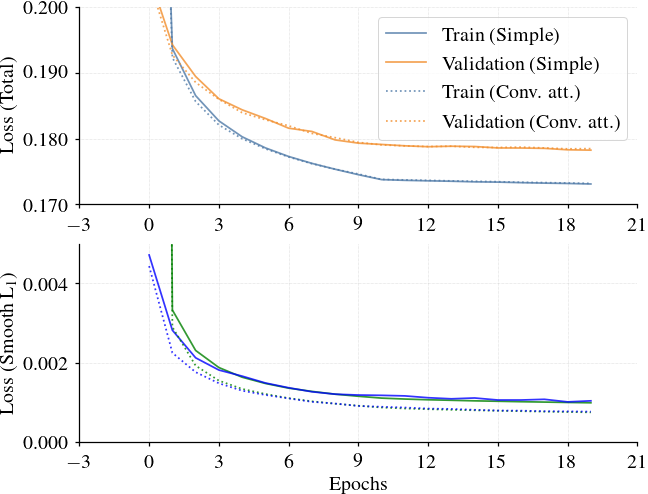

In [28]:
run_id_gru_1 = 1633085390
run_id_gru_3 = 1633779122

data_gru_1, config_gru_1 = get_data_config(run_id_gru_1, f"../results/rnn_carla")
data_gru_3, config_gru_3 = get_data_config(run_id_gru_3, f"../results/rnn_carla")

e = 20
fig = plt.figure(figsize=(10, 8))

text_temp = f"GRU Training Comparison"

# First
ax1 = fig.add_subplot(211)
ax1.plot(data_gru_1['epoch'][:e], data_gru_1['loss_train'][:e], alpha=0.8, c=colors[0])
ax1.plot(data_gru_1['epoch'][:e], data_gru_1['loss_val'][:e], alpha=0.8, c=colors[1])
ax1.plot(data_gru_3['epoch'][:e], data_gru_3['loss_train'][:e], alpha=0.8, c=colors[0], linestyle=':')
ax1.plot(data_gru_3['epoch'][:e], data_gru_3['loss_val'][:e], alpha=0.8, c=colors[1], linestyle=':')
#ax1.set_title(f"Loss - Total", fontdict = {'fontsize':ls})
ax1.legend(["Train (Simple)", "Validation (Simple)", 
    "Train (Conv. att.)", "Validation (Conv. att.)"], prop={"size":ls})
#ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss (Total)",  fontsize=ls)
ax1.grid(linestyle=":")
ax1.set_ylim([0.17, 0.2])
ax1.plot()

ax1.tick_params(axis='both', which='major', labelsize=ls)
ax1.tick_params(axis='both', which='minor', labelsize=ls)
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

# # Second
# ax1 = fig.add_subplot(312)
# ax1.plot(data_gru_1['epoch'][:e], data_gru_1['loss_train_image'][:e], alpha=0.8, c='g')
# ax1.plot(data_gru_1['epoch'][:e], data_gru_1['loss_val_image'][:e], alpha=0.8, c='b')
# ax1.plot(data_gru_3['epoch'][:e], data_gru_3['loss_train_image'][:e], alpha=0.8, c='g', linestyle=':')
# ax1.plot(data_gru_3['epoch'][:e], data_gru_3['loss_val_image'][:e], alpha=0.8, c='b', linestyle=':')
# ax1.set_title(f"Loss - Image (MS-SSIM)", fontdict = {'fontsize':20})
# # ax1.legend(["Train (Latent 64, ReLU Out)", "Validation (Latent 64, ReLU Out)", 
# #     "Train (Latent 128, ReLU Out)", "Validation (Latent 128, ReLU Out)", 
# #     "Train (Latent 512, Sigmoid)", "Validation (Latent 512, Sigmoid)"], prop={"size":16})
# #ax1.set_xlabel("Epochs")
# ax1.set_ylabel("Loss",  fontsize=20)
# ax1.grid(linestyle=":")
# ax1.set_ylim([0.16,0.2])
# ax1.plot()

# ax1.tick_params(axis='both', which='major', labelsize=20)
# ax1.tick_params(axis='both', which='minor', labelsize=20)

# Third
ax1 = fig.add_subplot(212)
ax1.plot(data_gru_1['epoch'][:e], data_gru_1['loss_train_latent'][:e], alpha=0.8, c='g')
ax1.plot(data_gru_1['epoch'][:e], data_gru_1['loss_val_latent'][:e], alpha=0.8, c='b')
ax1.plot(data_gru_3['epoch'][:e], data_gru_3['loss_train_latent'][:e], alpha=0.8, c='g', linestyle=':')
ax1.plot(data_gru_3['epoch'][:e], data_gru_3['loss_val_latent'][:e], alpha=0.8, c='b', linestyle=':')
#ax1.set_title(f"Loss - Latent (Smooth L1)", fontdict = {'fontsize':ls})
# ax1.legend(["Train (Latent 64, ReLU Out)", "Validation (Latent 64, ReLU Out)", 
#     "Train (Latent 128, ReLU Out)", "Validation (Latent 128, ReLU Out)", 
#     "Train (Latent 512, Sigmoid)", "Validation (Latent 512, Sigmoid)"], prop={"size":16})
ax1.set_xlabel("Epochs",  fontsize=ls)
ax1.set_ylabel("Loss (Smooth L$_1$)",  fontsize=ls)
#ax1.ticklabel_format(axis='y', style="sci", scilimits=(1,0))
ax1.grid(linestyle=":")
ax1.set_ylim([0, 0.005])
ax1.plot()

ax1.tick_params(axis='both', which='major', labelsize=ls)
ax1.tick_params(axis='both', which='minor', labelsize=ls)
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

fig.savefig("results_rnn.pdf", dpi=250)

/home/gorka/Git/latent-estimation/cdae/utils.py:669: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config_lstm = yaml.load(file)


/home/gorka/Git/latent-estimation/cdae/utils.py:669: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config_lstm = yaml.load(file)


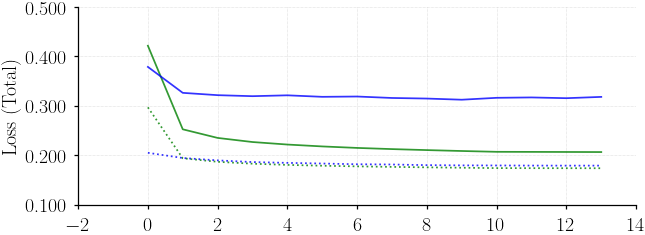

In [15]:
# 1632359449, # LSTM 128 Sigmoid
# 1632442787, # LSTM 128 ReLU
# 1632522834, # GRU 64 ReLU
# 1633085390, # GRU 128 ReLU

run_id_gru_1 = 1632442787
run_id_gru_2 = 1633085390

data_1, config_1 = get_data_config(run_id_gru_1, f"../results/rnn_carla")
data_2, config_2 = get_data_config(run_id_gru_2, f"../results/rnn_carla")

e = 14
fig = plt.figure(figsize=(10, 8))

text_temp = f"GRU Training Comparison"

# First
ax1 = fig.add_subplot(211)
ax1.plot(data_1['epoch'][:e], data_1['loss_train'][:e], alpha=0.8, c='g')
ax1.plot(data_1['epoch'][:e], data_1['loss_val'][:e], alpha=0.8, c='b')
ax1.plot(data_2['epoch'][:e], data_2['loss_train'][:e], alpha=0.8, c='g', linestyle=':')
ax1.plot(data_2['epoch'][:e], data_2['loss_val'][:e], alpha=0.8, c='b', linestyle=':')
#ax1.set_title(f"Loss - Total", fontdict = {'fontsize':ls})
#ax1.legend(["Train (Simple)", "Validation (Simple)", 
#    "Train (Conv. att.)", "Validation (Conv. att.)"], prop={"size":ls})
#ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss (Total)",  fontsize=ls)
ax1.grid(linestyle=":")
#ax1.set_ylim([0.1, 0.5])
ax1.plot()

ax1.tick_params(axis='both', which='major', labelsize=ls)
ax1.tick_params(axis='both', which='minor', labelsize=ls)
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

fig.savefig("results_rnn.pdf", dpi=250)